We analyze PSP...

In [1]:
import os
import numpy as np
import pandas as pd
from neuro_dmt.analysis.reporting import CircuitProvenance
from neuro_dmt.library.users.visood.sscx_dissemination.analyses.simulation\
    .psp_callibration import\
        PathwaySimulation,\
        TraceCollection,\
        ModelSimulationPSP,\
        PspTraceAnalysis,\
        PspAmplitudeAnalysis,\
        Adapter

In [2]:
project =\
    os.path.join(
        "/gpfs/bbp.cscs.ch/project")
proj_sscx_diss=\
    os.path.join(
        project,
        "proj83")
data_sscx_diss=\
    os.path.join(
        proj_sscx_diss,
        "data")
atlases_sscx_diss=\
    os.path.join(
        data_sscx_diss,
        "atlas/S1/MEAN")
circuits_sscx_diss=\
    os.path.join(
        proj_sscx_diss,
        "circuits")
path_bio_m =\
    os.path.join(
        circuits_sscx_diss,
        "Bio_M/20191206")
pspsim =\
    ModelSimulationPSP(
        path_simulation_data=os.path.join(
             proj_sscx_diss,
             "validation",
             "psp-validation"),
         provenance=CircuitProvenance(
            label="SSCxRatDisseminationBioM",
            authors=["BBP Team"],
            date_release="20191212",
            uri=path_bio_m,
            animal="Wistar Rat",
            age="P14 Weeks",
            brain_region="SSCx"))

In [3]:
adapter =\
    Adapter()
pathways =\
    adapter.get_pathways(pspsim)
reference_data =\
    pd.concat([
        pd.DataFrame(
            [[pspsim.simulation_data(p).reference.psp_amplitude["mean"],
             pspsim.simulation_data(p).reference.psp_amplitude["std"]]],
            columns=pd.MultiIndex.from_tuples([
                ("psp_amplitude", "mean"), ("psp_amplitude", "std")]))\
          .assign(pathway=p)
        for p in pathways]).set_index("pathway")
analysis_pspamps =\
    PspAmplitudeAnalysis(
        reference_data=reference_data)

In [4]:
measurement_pspamps =\
    analysis_pspamps.get_measurement(pspsim, adapter)
measurement_pspamps["data"].head()

100%|██████████| 20/20 [00:00<00:00, 27.94it/s]


psp_amplitude          
                                                  mean       std
dataset                  pathway                                
SSCxRatDisseminationBioM L6_TPC-L6_BC         2.217992  1.424933
                         L5_STPC-L5_STPC      0.635874  0.755823
                         L6_IPC-L6_BC         2.048705  1.326924
                         L6_TPC-L6_MC         0.204472  0.230584
                         L4_EXC-L4_EXC        1.642764  1.106569

100%|██████████| 20/20 [00:00<00:00, 702.75it/s]
/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


/Users/vishalsoodmuchu/.vmgr_repo/py37/lib/python3.7/site-packages/neuro_dmt/analysis/circuit/__init__.py Logger
INFO@<2020-02-11 21:31:27>                                                      

                Could not retrieve citations from reference data of type <class 'pandas.core.frame.DataFrame'>.
                



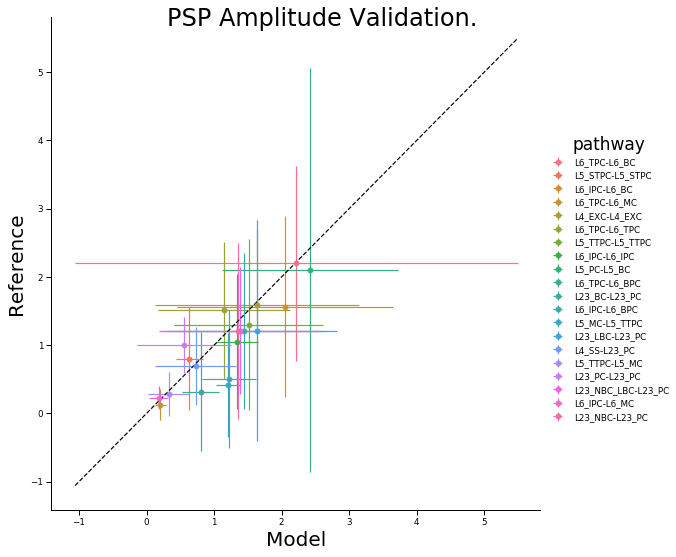

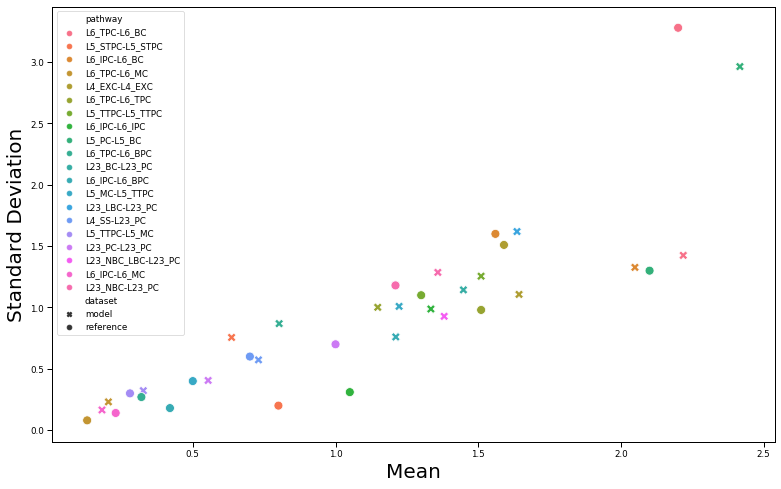

In [5]:
report = analysis_pspamps(pspsim, adapter)

In [5]:
from neuro_dmt.analysis.reporting import CheetahReporter
reporter_analyses =\
    CheetahReporter(
        path_output_folder=os.path.join(
            analysis_pspamps.path_reports,
            "analyses"))
reporter_analyses.post(report)

'/Users/vishalsoodmuchu/work/bbp/work/validations/dmt/v2/neuro_dmt/library/users/visood/sscx_dissemination/analyses/simulation/psp_callibration/notebooks/reports/analyses/psp_amplitude/20200211/192351'